# Modelling Latency

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import accumulate

## Generate Data

       Bytes            SourceIP       ICMPSeq       TTL           Time  TimeFiltered  ICMPSeqFiltered
0   64 bytes   from 192.168.4.2:    icmp_seq=1   ttl=255   time=1042 ms        1042.0                1
1   64 bytes   from 192.168.4.2:    icmp_seq=2   ttl=255   time=40.0 ms          40.0                2
2   64 bytes   from 192.168.4.2:    icmp_seq=3   ttl=255   time=14.0 ms          14.0                3
3   64 bytes   from 192.168.4.2:    icmp_seq=4   ttl=255   time=13.0 ms          13.0                4
4   64 bytes   from 192.168.4.2:    icmp_seq=5   ttl=255   time=17.1 ms          17.1                5
5   64 bytes   from 192.168.4.2:    icmp_seq=6   ttl=255   time=16.1 ms          16.1                6
6   64 bytes   from 192.168.4.2:    icmp_seq=7   ttl=255   time=15.0 ms          15.0                7
7   64 bytes   from 192.168.4.2:    icmp_seq=8   ttl=255   time=14.1 ms          14.1                8
8   64 bytes   from 192.168.4.2:    icmp_seq=9   ttl=255   time=13.4 ms  

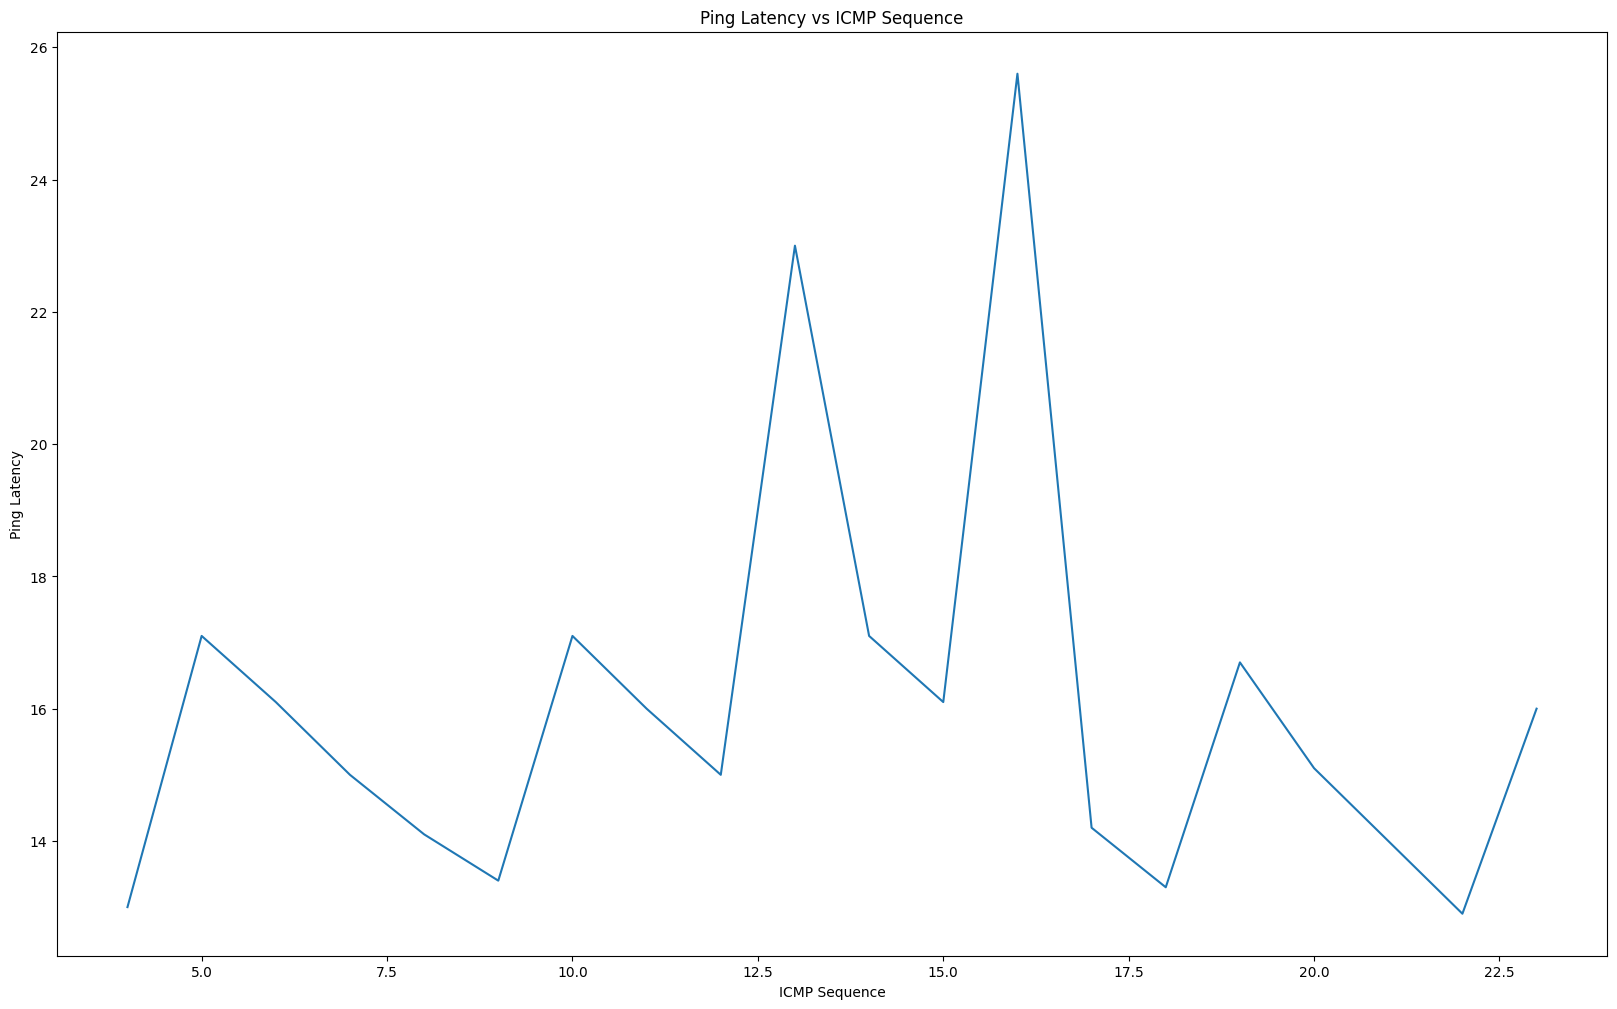

In [2]:
# df = pd.DataFrame()
# df['x1'] = np.random.uniform(-1,1, size=1000)
# df['x2'] = df['x1'] + np.random.uniform(-1,1, size=1000)
# df['x3'] = df['x2'] + np.random.uniform(-1,1, size=1000)
# df['x4'] = df['x3'] + np.random.uniform(-1, 1, size=1000)

# Feeding data from .csv file

columnNames = ['Bytes', 'SourceIP', 'ICMPSeq', 'TTL', 'Time']
csvfile = './data/endtoend1.csv'
df = pd.read_csv(csvfile, names=columnNames)

# Filtering data with extraction of latencies in float eliminating any string
df['TimeFiltered'] = df['Time'].str.extract(r'(\d+.\d+)').astype('float')
df['ICMPSeqFiltered'] = df['ICMPSeq'].str.extract(r'(\d+)').astype('int')

# Printing the resultant filtered data
print(df.to_string())

# Initial Plot
# plt.plot(df.ICMPSeqFiltered, df.TimeFiltered)
plt.plot(df.ICMPSeqFiltered[3:], df.TimeFiltered[3:])
plt.title("Ping Latency vs ICMP Sequence")
plt.xlabel('ICMP Sequence')
plt.ylabel('Ping Latency')
fig1 = plt.gcf()
fig1.set_size_inches(20, 12, forward=True)
plt.show()
# Saving the plot in mentoned file path
fig1.savefig('./plots/LineGraph-PingLatencyVSICMPSequence.png', dpi=100, facecolor='white', transparent=False)

## Start Plot

No of Data points:  23 

Data: 
 0     1042.0
1       40.0
2       14.0
3       13.0
4       17.1
5       16.1
6       15.0
7       14.1
8       13.4
9       17.1
10      16.0
11      15.0
12      23.0
13      17.1
14      16.1
15      25.6
16      14.2
17      13.3
18      16.7
19      15.1
20      14.0
21      12.9
22      16.0
Name: TimeFiltered, dtype: float64
Count:  [22  0  0  0  0  0  0  0  0  1] 

No. of bins:  [  12.9   115.81  218.72  321.63  424.54  527.45  630.36  733.27  836.18
  939.09 1042.  ] 



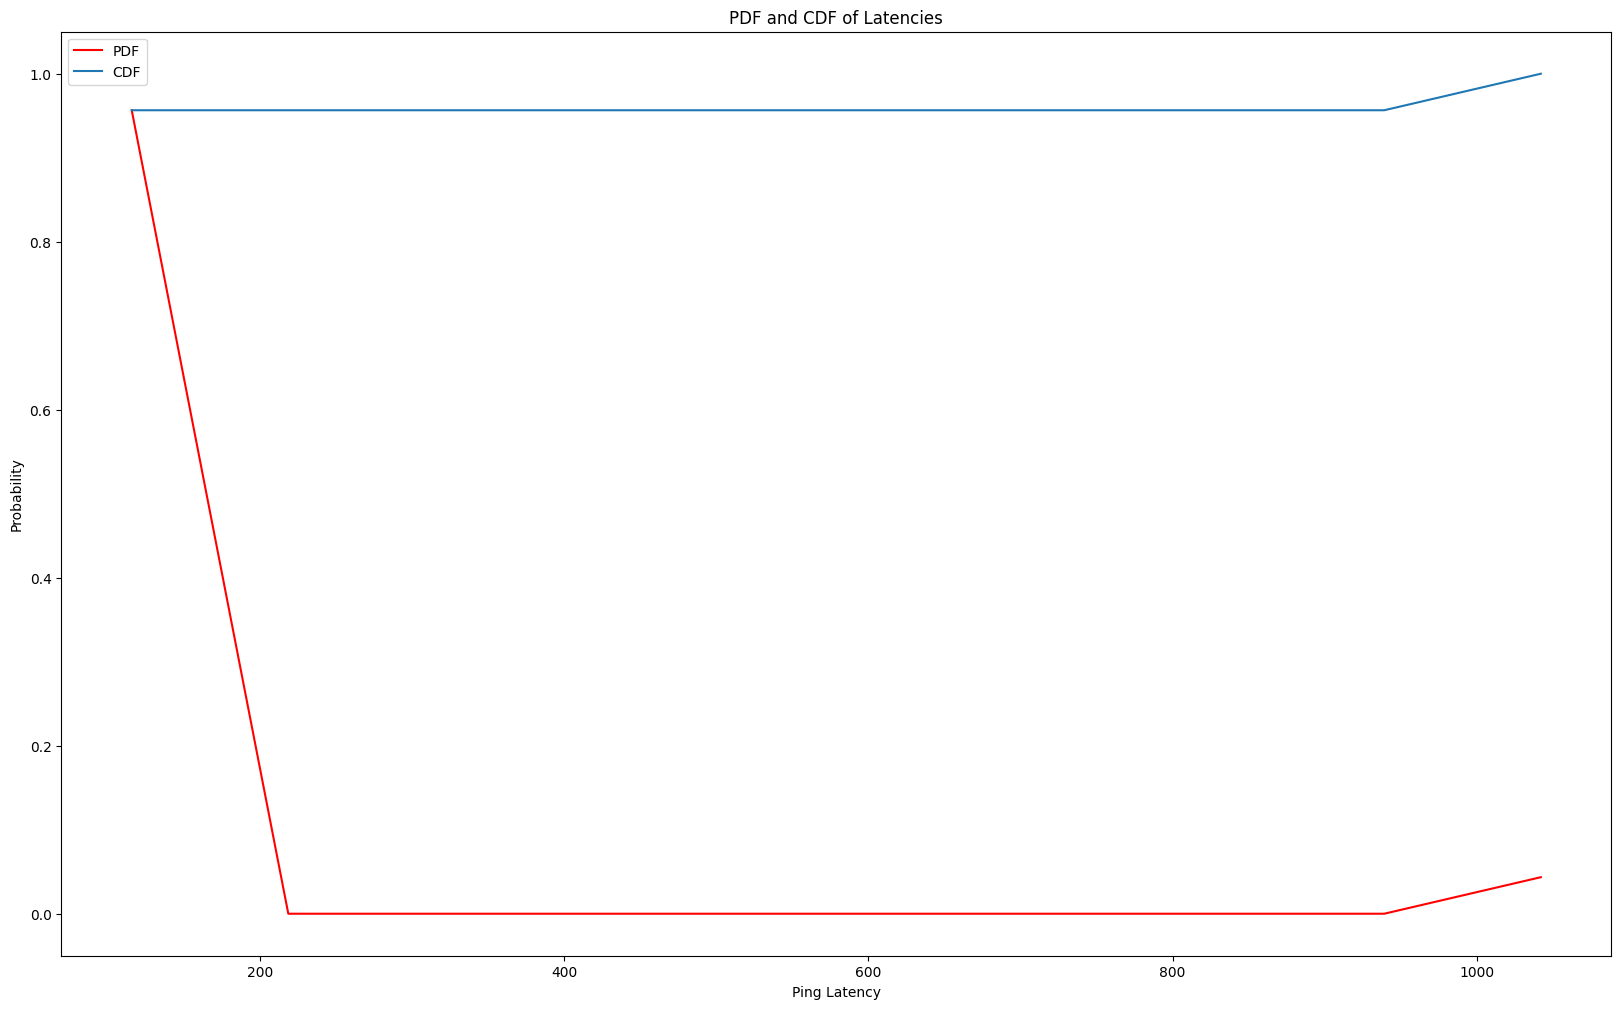

In [8]:
dataPoints = len(df.TimeFiltered)
print("No of Data points: ", dataPoints, '\n')

# No of Data points
# N = 500
N = dataPoints
  
# initializing random values
# data = np.random.randn(N)
data = df.TimeFiltered

print("Data: \n", data)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)

print("Count: ", count, '\n')
print("No. of bins: ", bins_count, '\n')
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
# plt.bar(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.title("PDF and CDF of Latencies")
plt.xlabel('Ping Latency')
plt.ylabel('Probability')
fig2 = plt.gcf()
fig2.set_size_inches(20, 12, forward=True)
plt.show()

# Saving the plot in mentoned file path
fig2.savefig('./plots/PDFandCDF.png', dpi=100, facecolor='white', transparent=False)

In [4]:
# fig,ax = plt.subplots()

# for col in df.columns:

  # SKIP IF IT HAS ANY INFINITE VALUES
  # if not all(np.isfinite(df[col].values)):
    # continue

  # USE numpy's HISTOGRAM FUNCTION TO COMPUTE BINS
  # xh, xb = np.histogram(df[col], bins=60, normed=True)

  # COMPUTE THE CUMULATIVE SUM WITH accumulate
  # xh = list(accumulate(xh))
  # NORMALIZE THE RESULT
  # xh = np.array(xh) / max(xh)

  # PLOT WITH LABEL
  # ax.plot(xb[1:], xh, label=f"$CDF$({col})")
# ax.legend()
# plt.title("CDFs of Columns")
# plt.show()